In [11]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [50]:
class heatmaps:


    #The class initializes the dataframes of all three datasets and list of dfs for easy access

    def __init__(self):
        self.df_inundacion = gpd.read_file('/Users/drossi/DevDownloads/atlas_de_riesgo_inundaciones/atlas_de_riesgo_inundaciones.shp')
        self.df_precipitacion = gpd.read_file('/Users/drossi/DevDownloads/atlas_de_riesgo_precipitacion/atlas_de_riesgo_precipitacion.shp')
        self.df_granizo =  gpd.read_file('/Users/drossi/DevDownloads/atlas_de_riesgo_granizo/atlas_de_riesgo_granizo.shp')
        self.lista_df = [self.df_inundacion, self.df_precipitacion, self.df_granizo]

    #Simple plot function
    
    def plot(self, num):

        df = self.lista_df[num]


        # Create a larger figure
        fig, ax = plt.subplots(figsize=(12, 12))

        # Plot the df_granizo data
        df.plot(column="int2", legend=True, legend_kwds={"label": "Intensidad de " +   self.lista_df[num]['taxonom'].iloc[0].lower(), "orientation": "horizontal"}, ax=ax)

        # Plot the target point

        #Falta modificar título
        titulo = "Holi"
        ax.axis('off')
        # Set the title
        plt.title(titulo, fontsize=16, fontweight='bold')

        # Show the plot
        plt.show()

    def position(self, long, lat, num):

        df = self.lista_df[num]


        # Create a GeoDataFrame containing the target point
        target_coordinate = Point(long, lat)
        result = df[df.contains(target_coordinate)]

        target_gdf = gpd.GeoDataFrame(geometry=[target_coordinate], crs=df.crs)

        #Checar si es la alcaldia correcta

        titulo = "El peligro por " + result['taxonom'].iloc[0].lower() + " en la alcaldia " + result['alcaldi'].iloc[0] + " es " + result['intnsdd'].iloc[0].lower()

        # Create a larger figure
        fig, ax = plt.subplots(figsize=(12, 12))

        # Plot df data
        #Falta agregar un mejor tamaño de subtitulo
        df.plot(column="int2", legend=True, legend_kwds={"label": "Intensidad de " +  result['taxonom'].iloc[0].lower(), "orientation": "horizontal"}, ax=ax)

        # Plot the target point
        target_gdf.plot(ax=ax, markersize=100, color='red', marker='*', label='Your Label', zorder=3)

        ax.axis('off')
  
        plt.title(titulo, fontsize=16, fontweight='bold')

        # Show the plot
        plt.show()



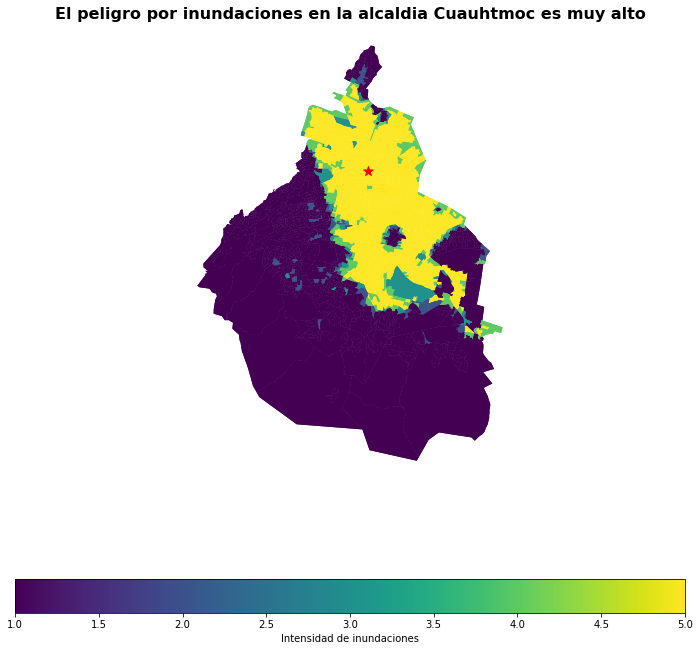

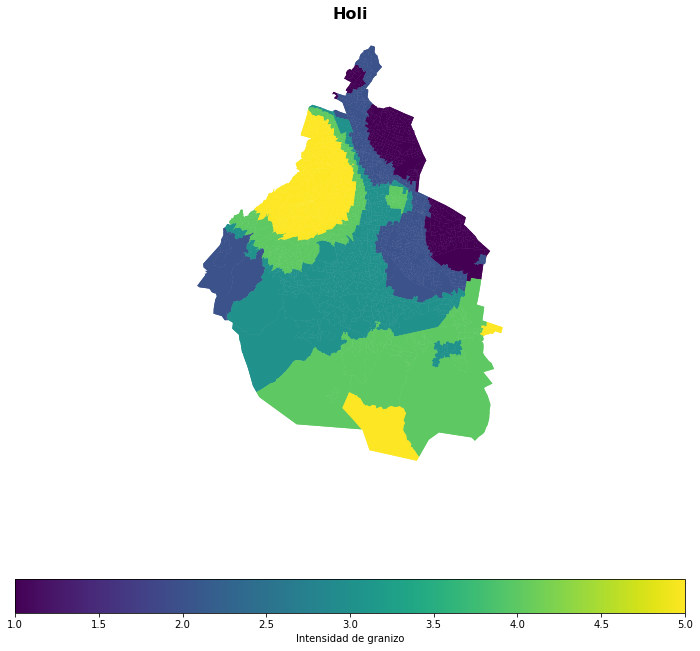

In [51]:
prueba = heatmaps()
v = -99.1276600
c = 19.4284700
prueba.position(v,c,0)
prueba.plot(2)